#### Use graph_env

In [1]:
!pip install networkx

  Using cached networkx-2.6.3-py3-none-any.whl (1.9 MB)


Complex network analysis (CNA) is a rapidly expanding discipline that studies how to recognize, describe, analyse, and visualize complex networks.

In general, a network is yet another—relational—form of organization and representation of discrete data. (The other one being tabular, with the data organized in rows and columns.) Two important network concepts are entities and the relationships between them.

Entities are known as nodes (the term we’ll use in this book), actors, or vertices.
Relationships are known as edges (preferred in this book), links, arcs, or
connections.

A discrete entity must be separable from all other entities—otherwise, it is not clear how to
represent it as a node. A relationship typically involves two discrete entities; in
other words, any two entities either are in a relationship or not. (An entity can be
in a relationship with itself. Such a relationship is called reflexive.)


<img src="./images/networks.png" alt="Network" />

It is not directly possible to use networks to model relationships that involve more than
two entities, but if such modeling is really necessary, then you can use hypergraphs


if A happened immediately after B (there is an edge from A to B), then B did not happen after A (there is no reverse edge).

In a hierarchical system that consists of parts, sub-parts, and sub-sub-parts (such as this book), a part at any level of the hierarchy is an entity. The relationship between the entities is “a part of”: a paragraph is “a part of” a subsection, which is “a part of” a section, which is “a part of” a
chapter, which is “a part of” a book.

Let’s glance at some complex networks. The following table shows the major
classes of complex networks and some representatives from each class.


<img src="./images/lib_compare.png" alt="lib_compare" />

You can think of CNA as a generalization of social network analysis (SNA) to include non-social networks.

Social network analysis addresses social networks at three levels: microscopic, mesoscopic, and macroscopic. 

•	At the microscopic level, we view a network as an assembly of individual nodes, dyads (pairs of connected nodes; essentially, edges), triads (triples of nodes, connected in a triangular way), and subsets (tightly knit groups of nodes). 

•	A mesoscopic view focuses on exponential random graph models (ERGMs), scale-free and small-world networks, and network evolution. 

•	Finally, at the macroscopic level, the more general complex network analysis fully absorbs SNA, abstracting from the social origins of social networks and concentrating on the properties of very large real-world graphs, such as degree distribution, assortative, and hierarchical structure (Exploring Complex Networks).


Now, take a sheet of paper and a pencil and transcribe the list of food and nutrient items into a network, as follows:

•	Choose the first nutrient from the list—say, it is vitamin D. Draw a circle that represents vitamin D and label it “D.”

•	Vitamin D is provided by fatty fish; draw a circle that represents fatty fish, label it “fatty fish,” and connect to the “D” node.

•	Vitamin D is also provided by mushrooms; draw a circle that represents mushrooms, label it “mushrooms,” and connect to the “D” node.

•	Repeat the previous steps for each combination of food types and nutrients.

•	Do not duplicate nodes! If a nutrient is provided by the food type that already has a node, connect the nutrient to the existing node.


The method of starting with a “seed” node and following the edges to discover other nodes is called snowball sampling (“snowballing”). Your network starts as a single snowflake and grows over time until either you are happy with its size or there is no more “snow” to add. Beware: snowballing may overlook small and medium-size network chunks if you choose an improper seed. To mitigate
potential problems in networks that consist of several disjointed parts (so-called unconnected graphs), it might be best to select several seeds and follow all edges originating from them.


Graph Tools

<img src="./images/tools.png" alt="lib_compare" />

We will use the following terminology throughout the book to refer to the relationships between nodes and edges:

•	A node is incident to an edge if it is the start or end of the edge. The edge,

•	respectively, is incident to its end nodes.

•	Two nodes are adjacent if they are incident to the same edge.

•	Two edges are adjacent if they are incident to the same node.


### networkX

In [15]:
import networkx as nx
import matplotlib.pyplot as plt

NetworkX supports four graph types

1- Undirected graphs consist only of undirected edges- edges that can be traversed in either direction so that an edge from A to B is the same as an edge from B to A. Mathematically, undirected graphs represent symmetric relationships: if A is in a relationship with B, then B is also in a relationship with A. It can have self-loop (connected with itself)

<img src="./images/type_graph.png" alt="lib_compare" />

In [6]:
G = nx.Graph()

2- Directed graphs, also known as digraphs, have at least one directed edge. “Being the father of” is a symmetric relationship and would be represented by a directed edge. You would use a directed graph for a family network that shows fathership and mothership.

<img src="./images/type_graph.png" alt="lib_compare" />

In [7]:
G = nx.DiGraph()

Many NetworkX algorithms refuse to calculate with digraphs. You can convert a digraph into an undirected graph. All directed edges become undirected, and all pairs of two reciprocal edges become single edges.

In [ ]:
F = nx.Graph(G) # F is undirected

3- Multigraphs are like undirected graphs, but they can have parallel edges multiple edges between the same nodes. For example, Alice may be a classmate of Bob, but she also may be his friend.

<img src="./images/multigraph.png" alt="lib_compare" />

In [9]:
G = nx.MultiGraph()

4- Directed multigraphs are what they say they are: directed graphs
with parallel edges.


In [8]:
G = nx.MultiDiGraph()

### Add or Remove items from graph

One by one, from a list or another graph

Node and edge manipulations are subject to the following rules:

•	Adding an edge to a graph also ensures that its ends are added if they did

•	not exist before.

•	Adding a duplicate node or edge is silently ignored unless the graph is a multigraph; in the latter case, an additional parallel edge is created.

•	Removing an edge does not remove its end nodes.

•	Removing a node removes all incident edges.

•	Removing a single non-existent node or edge raises a NetworkXError exception, but if the node or edge is a part of a list, then an error is silently ignored.


#### Add

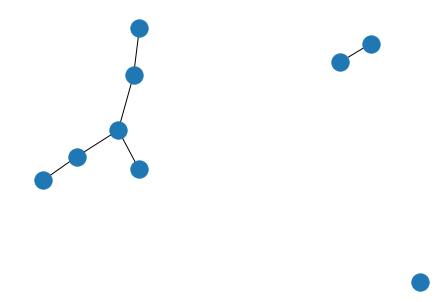

In [18]:
G = nx.Graph([("A", "eggs"),])
G.add_node("spinach") # Add a single node
G.add_node("Hg") # Add a single node by mistake
G.add_nodes_from(["folates", "asparagus", "liver"]) # Add a list of nodes
G.add_edge("spinach", "folates") # Add one edge, both ends exist
G.add_edge("spinach", "heating oil") # Add one edge by mistake
G.add_edge("liver", "Se") # Add one edge, one end does not exist
G.add_edges_from([("folates", "liver"), ("folates", "asparagus")])
nx.draw(G)
plt.show()

#### Remove

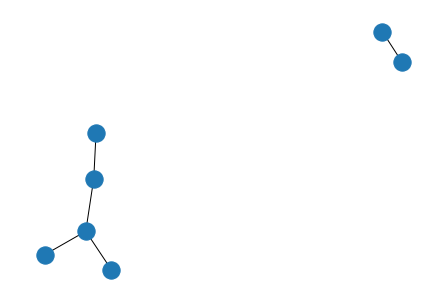

In [19]:
G.remove_node("Hg")
G.remove_nodes_from(["Hg",]) # Safe to remove a missing node using a list
G.remove_edge("spinach", "heating oil")
G.remove_edges_from([("spinach", "heating oil"), ]) # See above
G.remove_node("heating oil") # Not removed yet
nx.draw(G)
plt.show()

#### Delete entire graph

In [20]:
G.clear()

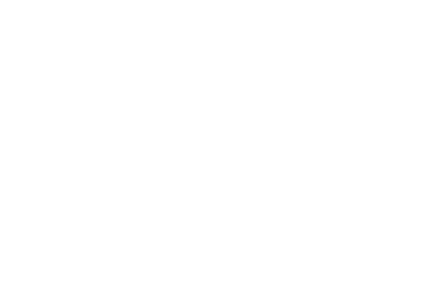

In [21]:
nx.draw(G)

In [24]:
G = nx.Graph([("A", "eggs"),])
G.add_node("spinach") # Add a single node
G.add_node("Hg") # Add a single node by mistake
G.add_nodes_from(["folates", "asparagus", "liver"]) # Add a list of nodes
G.add_edge("spinach", "folates") # Add one edge, both ends exist
G.add_edge("spinach", "heating oil") # Add one edge by mistake
G.add_edge("liver", "Se") # Add one edge, one end does not exist
G.add_edges_from([("folates", "liver"), ("folates", "asparagus")])

#### Get node

In [27]:
print(G.nodes()) # will return only list of nodes
print()
print(G.nodes(data=True))


['A', 'eggs', 'spinach', 'Hg', 'folates', 'asparagus', 'liver', 'heating oil', 'Se']

[('A', {}), ('eggs', {}), ('spinach', {}), ('Hg', {}), ('folates', {}), ('asparagus', {}), ('liver', {}), ('heating oil', {}), ('Se', {})]


#### Check all the relations

In [28]:
print(G.edges()) # will return only list of nodes
print()
print(G.edges(data=True))

[('A', 'eggs'), ('spinach', 'folates'), ('spinach', 'heating oil'), ('folates', 'liver'), ('folates', 'asparagus'), ('liver', 'Se')]

[('A', 'eggs', {}), ('spinach', 'folates', {}), ('spinach', 'heating oil', {}), ('folates', 'liver', {}), ('folates', 'asparagus', {}), ('liver', 'Se', {})]


#### Number of nodes

In [29]:
len(G)

9

#### Read data from CSV

In [30]:
import networkx as nx
import matplotlib.pyplot as plt
# import dzcnapy_plotlib as dzcnapy
import csv


In [45]:
with open("./data/sample_graph_data.csv") as infile:
    csv_reader = csv.reader(infile)
    G = nx.Graph(csv_reader)

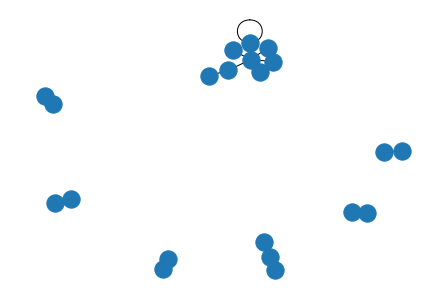

In [46]:
nx.draw(G)

In [47]:
print(G.nodes())

['ï»¿A', 'carrots', 'A', 'eggs', 'fatty fish', 'green leafy vegs', 'liver', 'milk', 'tomatoes', 'B12', 'B6', 'asparagus', 'beans', 'shellfish', 'Se', 'thiamin', 'whole grains', 'veg oils', 'E', 'yogurt', 'Ca']


#### Remove self loops

In [48]:
loops = nx.selfloop_edges(G)
print(list(loops))

[('tomatoes', 'tomatoes')]


In [49]:
G.remove_edges_from(loops)

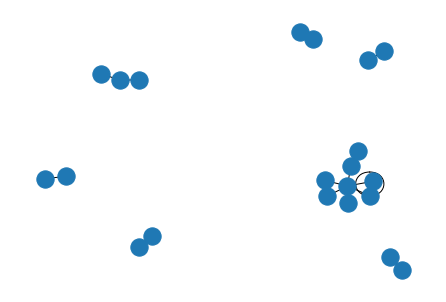

In [50]:
nx.draw(G)

In [51]:
list(nx.selfloop_edges(G))

[('tomatoes', 'tomatoes')]

We will use dictionary comprehension to walk through all network nodes and
convert those labeled with strings to the title case (capitalize the first letter of
each word).

In [52]:
mapping = {node: node.title() for node in G if isinstance(node, str)}
nx.relabel_nodes(G, mapping, copy=False)
print(G.nodes())

['A', 'B12', 'B6', 'Se', 'E', 'Ca', 'Yogurt', 'Veg Oils', 'Whole Grains', 'Thiamin', 'Shellfish', 'Beans', 'Asparagus', 'Tomatoes', 'Milk', 'Liver', 'Green Leafy Vegs', 'Fatty Fish', 'Eggs', 'Carrots', 'Ï»¿A']


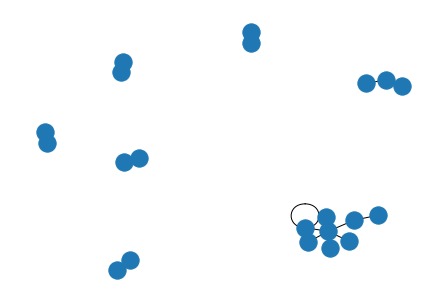

In [53]:
nx.draw(G)

#### Access nodes

In [58]:
print(G["B6"])

{'Beans': {}, 'Asparagus': {}}


#### Add Attributes

A node or edge attribute describes its non-structural properties. For example,
edge attributes may represent weight, strength, or throughput. Node attributes
may represent edge, color, size, or gender.

A graph whose edges have this attribute is called a weighted graph.

In [61]:
G.add_node("Honey", edible=True)
G.add_nodes_from([("Steel", {"edible" : False}), ])
G.add_edge("Honey", "Steel", weight=0.0)
G.add_edges_from([("Honey", "Zn"),], related=False)
G.add_weighted_edges_from([("Honey", "Zn", 0.01),("Honey", "Sugar", 0.99)])

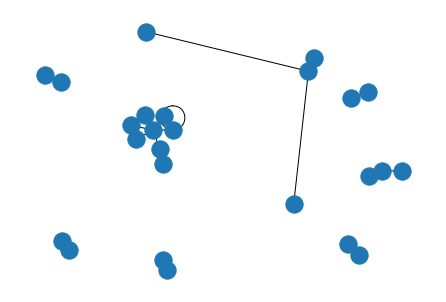

In [62]:
nx.draw(G)

Define or change an attribute of existing nodes and edges by calling

nx.set_node_attributes or nx.set_edge_attributes

E.g.

nx.set_node_attributes(G, att_name, node_dict)

nx.set_edge_attributes(G, att_name, edge_dict)

Here, att_name is the name of the affected attribute, node_dict/edge_dict is a
dictionary whose keys are existing node labels or edge pairs, and values are
attribute values for the respective nodes/edges. If the attribute doesn’t exist
yet, it’s created; otherwise, the value of the existing attribute is changed. If
a key isn’t a node label or edge pair, the methods raise a KeyError exception.

Define or change an attribute of individual existing nodes and edges
directly through the dictionary interfaces G.node

In [ ]:
"Honey", "Zn", 0.01

In [74]:
G["Honey"]["Zn"]

{'related': False, 'weight': 0.01}

In [77]:
G.nodes["B6"]["nutrient"] = True # Zinc is a nutrient
G["Honey"]["Zn"]["weight"] = 0.95 # Zinc and beef are well connected

In [78]:
G.edges()

EdgeView([('A', 'Tomatoes'), ('A', 'Milk'), ('A', 'Liver'), ('A', 'Green Leafy Vegs'), ('A', 'Fatty Fish'), ('A', 'Eggs'), ('B12', 'Milk'), ('B6', 'Beans'), ('B6', 'Asparagus'), ('Se', 'Shellfish'), ('E', 'Veg Oils'), ('Ca', 'Yogurt'), ('Whole Grains', 'Thiamin'), ('Tomatoes', 'Tomatoes'), ('Carrots', 'Ï»¿A'), ('Honey', 'Steel'), ('Honey', 'Zn'), ('Honey', 'Sugar')])

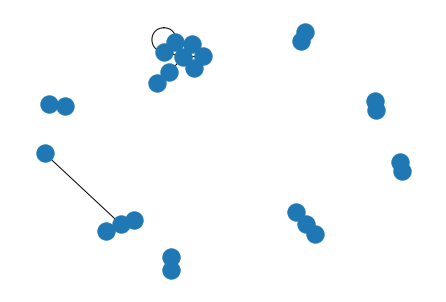

In [79]:
nx.draw(G)

#### Delete attributes

In [84]:
G.nodes["B6"]["nutrient"] = True # Zinc is a nutrient
G["Honey"]["Zn"]["weight"] = 0.95 # Zinc and beef are well connected

In [86]:
del G.nodes["B6"]["nutrient"]
del G["Honey"]["Zn"]["weight"]

In [87]:
G.nodes["B6"]

{}

Let’s create a boolean attribute "nutrient" that is true for nutrients and false for foods.

In [90]:
nutrients = set(("B12", "Zn", "D", "B6", "A", "Se", "Cu", "Folates",
"Ca", "Mn", "Thiamin", "Riboflavin", "C", "E", "Niacin"))
nutrient_dict = {node: (node in nutrients) for node in G}
nutrient_dict

{'A': True,
 'B12': True,
 'B6': True,
 'Se': True,
 'E': True,
 'Ca': True,
 'Yogurt': False,
 'Veg Oils': False,
 'Whole Grains': False,
 'Thiamin': True,
 'Shellfish': False,
 'Beans': False,
 'Asparagus': False,
 'Tomatoes': False,
 'Milk': False,
 'Liver': False,
 'Green Leafy Vegs': False,
 'Fatty Fish': False,
 'Eggs': False,
 'Carrots': False,
 'Ï»¿A': False,
 'Honey': False,
 'Steel': False,
 'Zn': True,
 'Sugar': False}

In [91]:
nx.set_node_attributes(G,name='nutrients',values=nutrient_dict)

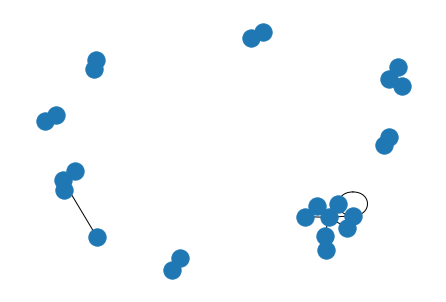

In [92]:
nx.draw(G)

In [93]:
print(G.nodes(data=True))

[('A', {'nutrients': True}), ('B12', {'nutrients': True}), ('B6', {'nutrients': True}), ('Se', {'nutrients': True}), ('E', {'nutrients': True}), ('Ca', {'nutrients': True}), ('Yogurt', {'nutrients': False}), ('Veg Oils', {'nutrients': False}), ('Whole Grains', {'nutrients': False}), ('Thiamin', {'nutrients': True}), ('Shellfish', {'nutrients': False}), ('Beans', {'nutrients': False}), ('Asparagus', {'nutrients': False}), ('Tomatoes', {'nutrients': False}), ('Milk', {'nutrients': False}), ('Liver', {'nutrients': False}), ('Green Leafy Vegs', {'nutrients': False}), ('Fatty Fish', {'nutrients': False}), ('Eggs', {'nutrients': False}), ('Carrots', {'nutrients': False}), ('Ï»¿A', {'nutrients': False}), ('Honey', {'edible': True, 'nutrients': False}), ('Steel', {'edible': False, 'nutrients': False}), ('Zn', {'nutrient': True, 'nutrients': True}), ('Sugar', {'nutrients': False})]


In [95]:
from book_code import dzcnapy_plotlib as dzcnapy

In [99]:
colors = ["yellow" if n[1]["nutrients"] else "pink" for n in G.nodes(data=True)]
dzcnapy.medium_attrs["node_color"] = colors

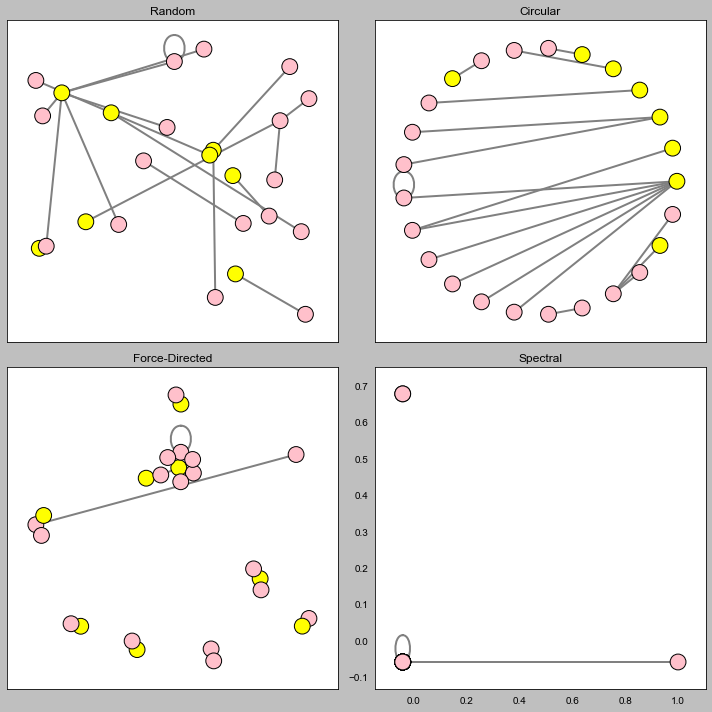

In [105]:
_, plot = plt.subplots(2, 2,figsize=(10, 10))
subplots = plot.reshape(1, 4)[0]
layouts = (nx.random_layout, nx.circular_layout, nx.spring_layout,
nx.spectral_layout)
titles = ("Random", "Circular", "Force-Directed", "Spectral")
for plot, layout, title in zip(subplots, layouts, titles):
    pos = layout(G)
    nx.draw_networkx(G, pos=pos, ax=plot, with_labels=False,**dzcnapy.medium_attrs)
    plot.set_title(title)

dzcnapy.set_extent(pos, plot)
dzcnapy.plot("nutrients")

findfont: Font family ['Liberation Sans Narrow'] not found. Falling back to DejaVu Sans.


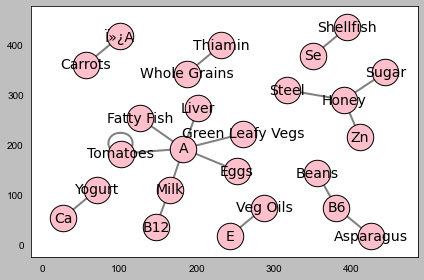

In [107]:
from networkx.drawing.nx_agraph import graphviz_layout

_, plot = plt.subplots()
pos = graphviz_layout(G)
nx.draw_networkx(G, pos, **dzcnapy.attrs)
dzcnapy.set_extent(pos, plot)
dzcnapy.plot("nutrients-graphviz")